First, import all necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


Let's read few lines of the data set





In [ ]:
# read the dataset
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Since the columns 'Unnamed: 32' and 'id'are unnecessary we will drop them

In [ ]:
# Data Preparation
# Drop unnecessary columns ('Unnamed: 32' and 'id')
df = df.drop(columns=['Unnamed: 32', 'id'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


  we are encoding the target variable 'diagnosis'  0 for  benign (B) and 1 for malignant (M)

In [ ]:
# Encode the target variable 'diagnosis' (B = 0, M = 1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

 Let's check for any null values

In [ ]:
# Check for missing values
print("Missing values:\n", df.isna().sum())

Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Great, no missing values!

In [ ]:

print(f"Number of rows: {len(df)} | Number of columns: {len(df.columns)}")


Number of rows: 569 | Number of columns: 31


So, there are 30 features with 2 target variables benign (B) and malignant (M).

Let's check the summary of numerical and categorical features

In [ ]:
abscence = (df['diagnosis'] == 0).sum()
presence = (df['diagnosis'] == 1).sum()
print(f"Number of Benign cases: {abscence} | Number of Malignant cases: {presence}\nRatio: {abscence/presence:.2f}%")

Number of Benign cases: 357 | Number of Malignant cases: 212
Ratio: 1.68%


In [ ]:
# summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
df.describe(include =[np.number])


Summary statistics of numerical columns:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



The dataset shows potential **outliers** in several features that will need to be addressed during **data cleaning.**

 For example, **area_mean** has a maximum value of **2501.0**, which is much higher than the 75th percentile value of **782.7**, suggesting extreme variations.

  Similarly, **radius_mean** has a maximum of **28.11** compared to a 75th percentile of **15.78**, and **perimeter_mean** shows a maximum of **188.5**, far above the 75th percentile of **104.1**. Features like **concave points_mean** also display high variability, with a maximum value of **0.4288** compared to a 75th percentile of 0.074.
  
  These potential anomalies will be handled during preprocessing to improve data quality and reliability for model training

Now, the Visualizations

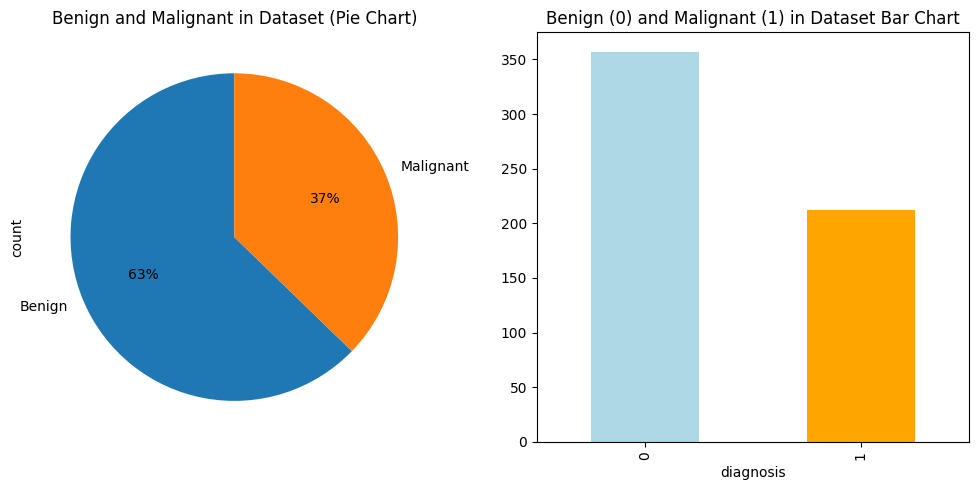

In [ ]:

# Exploratory Data Analysis (EDA)
# Visualization: Pie chart and bar chart for target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for target distribution
df['diagnosis'].value_counts().plot.pie(
    autopct='%1.0f%%', labels=['Benign', 'Malignant'], startangle=90, ax=ax1
)
ax1.set_title('Benign and Malignant in Dataset (Pie Chart)')

# Bar chart for target distribution
df['diagnosis'].value_counts().plot(kind='bar', ax=ax2, color=['lightblue', 'orange'])
ax2.set_title('Benign (0) and Malignant (1) in Dataset Bar Chart')
plt.tight_layout()
plt.show()


Let's check the correlation and draw the heat map

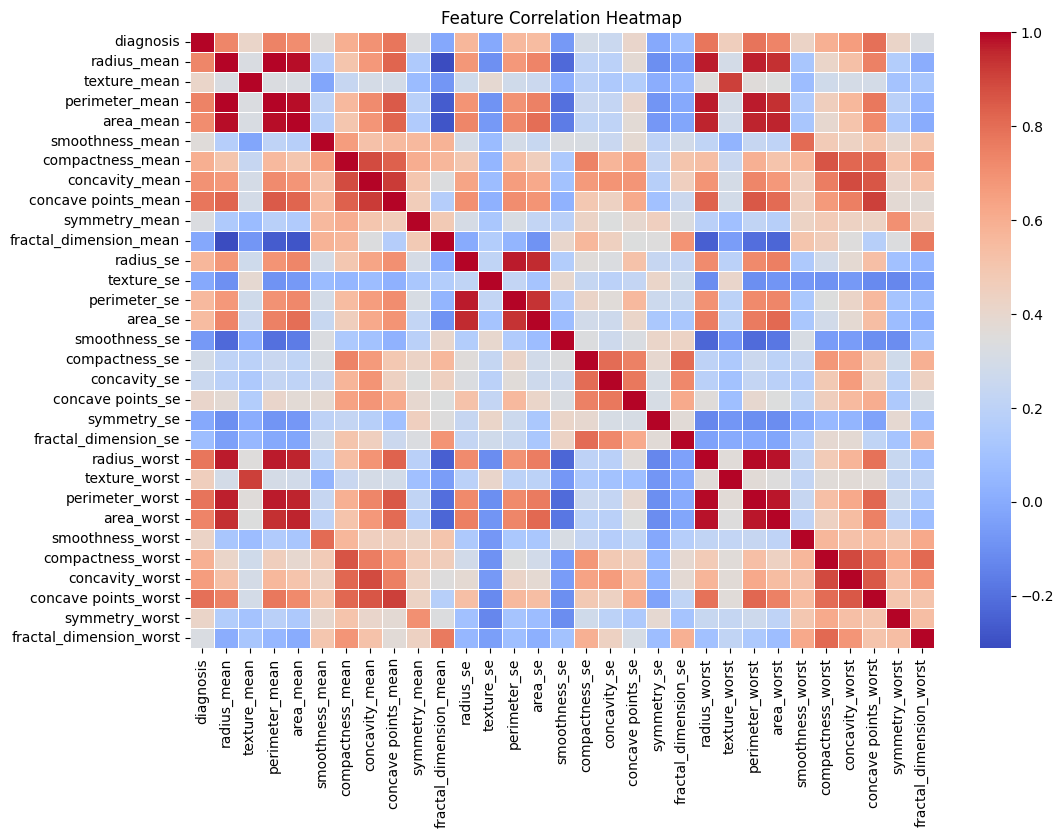

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Taking a look at the correlation matrix above, it's easy to see that some features have negative correlation with the target value while some have positive. Next, lets take a look at the histograms for each variable.

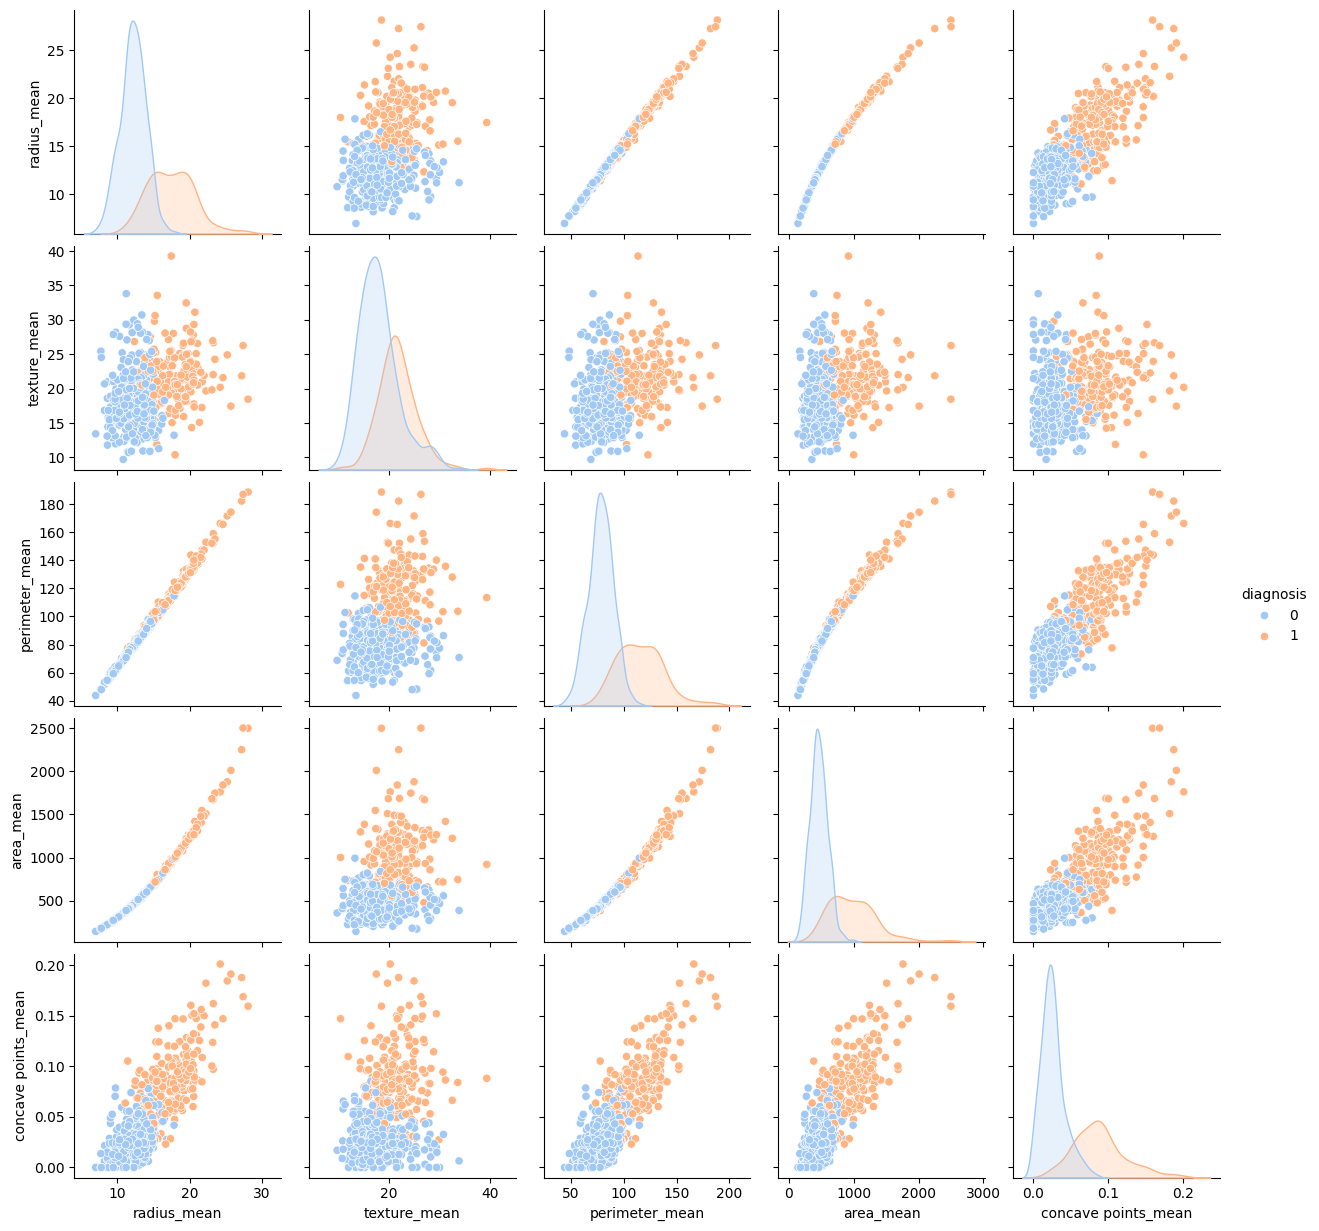

In [ ]:
# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean']
sns.pairplot(df, hue='diagnosis', vars=selected_features, palette='pastel')
plt.show()


In [ ]:
# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]
print(f"Dataset size after outlier removal: {df.shape}")

Dataset size after outlier removal: (495, 31)


In [ ]:
# Preprocessing: Feature scaling
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Preprocessing: Normalization
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X_scaled)
# Split dataset (standardized and normalized)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_norm, X_test_norm, _, _ = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

<ipython-input-126-23b1a5588165>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='diagnosis', y=feature, errorbar=None, palette='pastel')


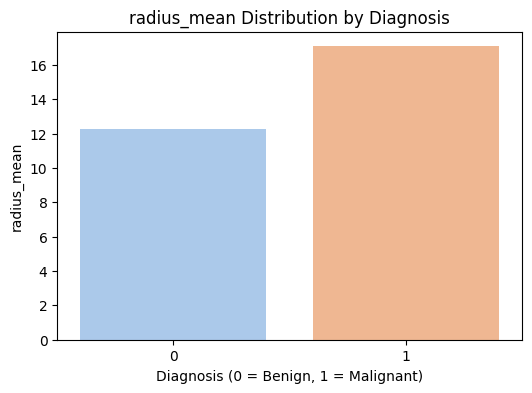

<ipython-input-126-23b1a5588165>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='diagnosis', y=feature, errorbar=None, palette='pastel')


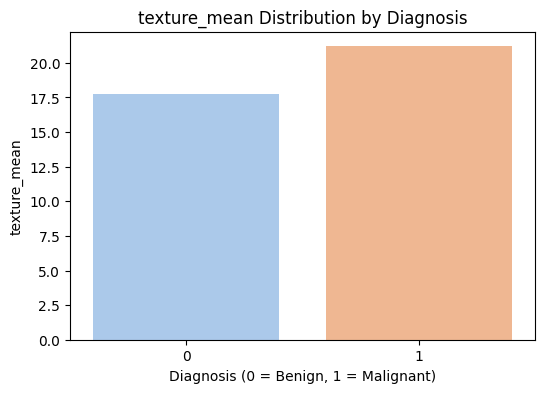

<ipython-input-126-23b1a5588165>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='diagnosis', y=feature, errorbar=None, palette='pastel')


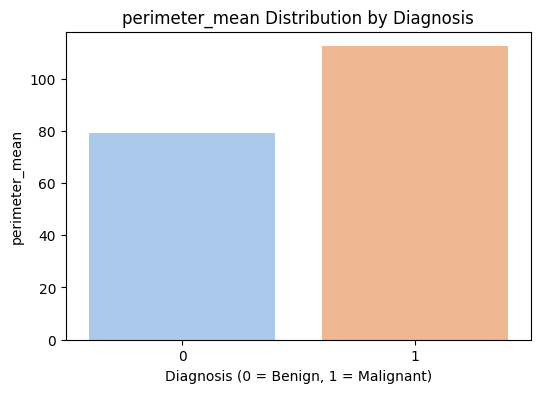

<ipython-input-126-23b1a5588165>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='diagnosis', y=feature, errorbar=None, palette='pastel')


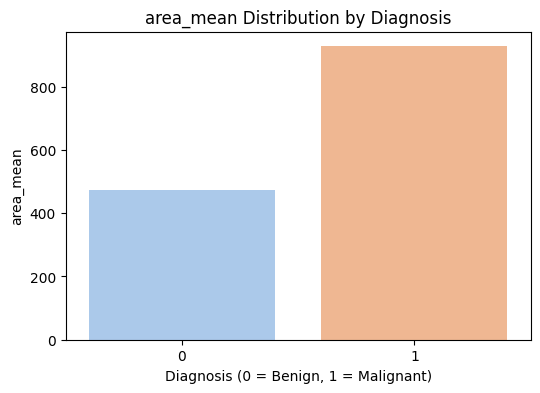

<ipython-input-126-23b1a5588165>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='diagnosis', y=feature, errorbar=None, palette='pastel')


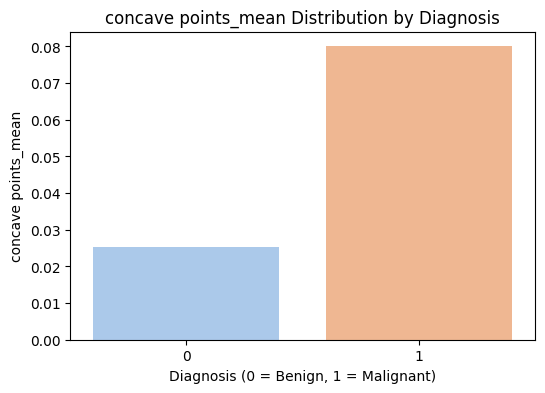

In [ ]:
# Bar charts for important features
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x='diagnosis', y=feature, errorbar=None, palette='pastel')
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
    plt.ylabel(feature)
    plt.show()

In [ ]:
# PCA for dimensionality reduction
pca = PCA().fit(X_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

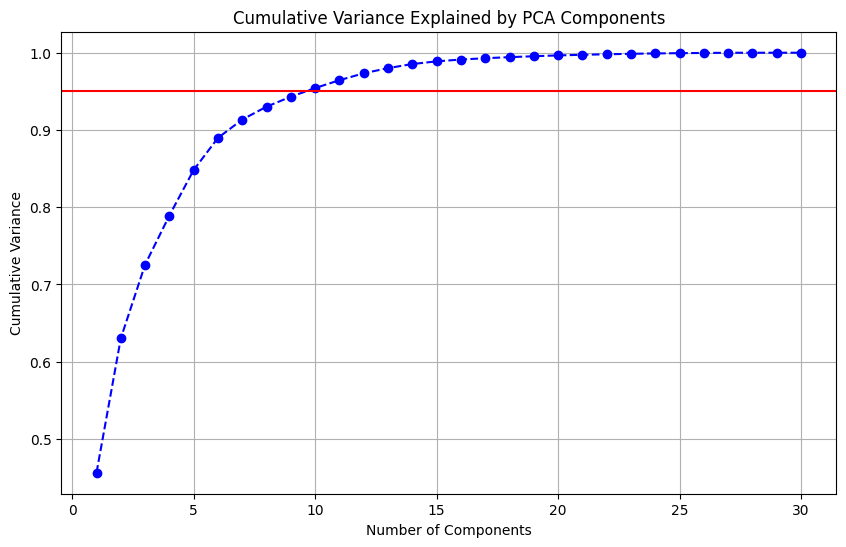

In [ ]:
# Cumulative variance graph with cutoff threshold
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()

In [ ]:
# Determine the number of components to explain 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components needed to explain 95% variance: {n_components_95}")

Number of components needed to explain 95% variance: 10


In [ ]:
# Apply PCA with the determined components
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_scaled)

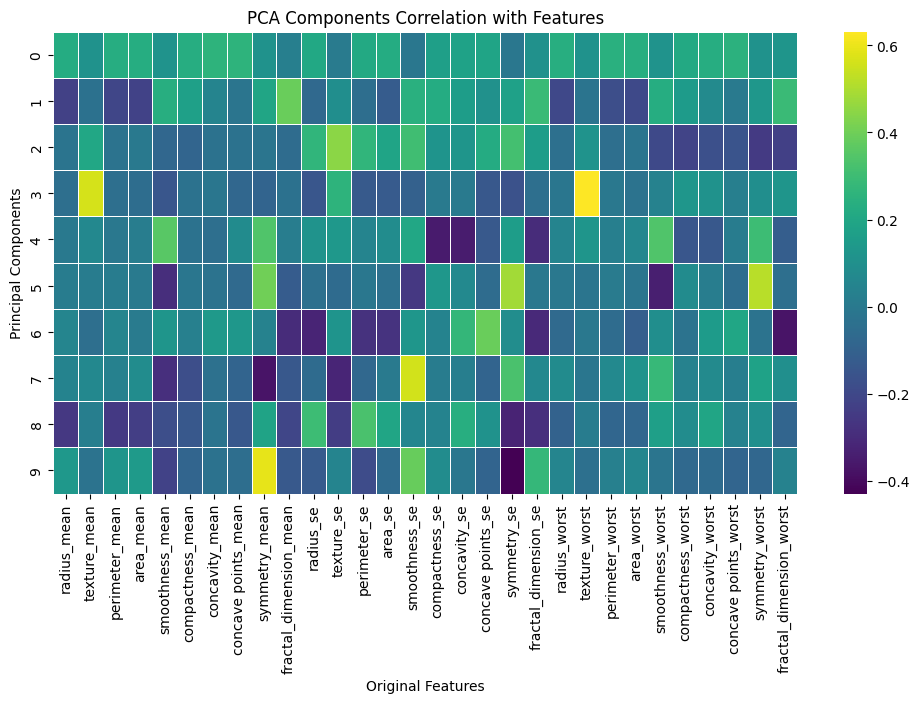

In [ ]:
# Heatmap for PCA components correlation with features
df_pc = pd.DataFrame(pca.components_, columns=df.drop('diagnosis', axis=1).columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df_pc, cmap='viridis', annot=False, linewidths=0.5)
plt.title('PCA Components Correlation with Features')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9797979797979798
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.95      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.97      0.98        99
weighted avg       0.98      0.98      0.98        99

Random Forest Confusion Matrix:
 [[61  0]
 [ 2 36]]


In [ ]:
# Random Forest with normalized data
rf_norm = RandomForestClassifier(random_state=42)
rf_norm.fit(X_train_norm, y_train)
y_pred_rf_norm = rf_norm.predict(X_test_norm)
print("\nRandom Forest (Normalized) Accuracy:", accuracy_score(y_test, y_pred_rf_norm))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_norm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_norm))


Random Forest (Normalized) Accuracy: 0.98989898989899
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        38

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

Confusion Matrix:
 [[61  0]
 [ 1 37]]


In [ ]:
# Logistic Regression
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Evaluate Logistic Regression
y_pred_lr = lr_clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9797979797979798
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99

Logistic Regression Confusion Matrix:
 [[60  1]
 [ 1 37]]


In [ ]:
# Logistic Regression with L1 Regularization (Lasso)
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lr_l1.fit(X_train, y_train)
y_pred_lr_l1 = lr_l1.predict(X_test)
print("\nLogistic Regression (L1 Regularization) Accuracy:", accuracy_score(y_test, y_pred_lr_l1))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_l1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_l1))


Logistic Regression (L1 Regularization) Accuracy: 0.9797979797979798
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99

Confusion Matrix:
 [[60  1]
 [ 1 37]]


In [ ]:
# Logistic Regression with L2 Regularization (Ridge)
lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
lr_l2.fit(X_train, y_train)
y_pred_lr_l2 = lr_l2.predict(X_test)
print("\nLogistic Regression (L2 Regularization) Accuracy:", accuracy_score(y_test, y_pred_lr_l2))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_l2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_l2))


Logistic Regression (L2 Regularization) Accuracy: 0.9797979797979798
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99

Confusion Matrix:
 [[60  1]
 [ 1 37]]


In [ ]:
# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)


In [ ]:
# Split dataset with RFE features
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)


In [ ]:
# Random Forest with RFE
rf_rfe_clf = RandomForestClassifier(random_state=42)
rf_rfe_clf.fit(X_train_rfe, y_train_rfe)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate Random Forest with RFE
y_pred_rf_rfe = rf_rfe_clf.predict(X_test_rfe)
print("Random Forest with RFE Accuracy:", accuracy_score(y_test_rfe, y_pred_rf_rfe))
print("Random Forest with RFE Classification Report:\n", classification_report(y_test_rfe, y_pred_rf_rfe))
print("Random Forest with RFE Confusion Matrix:\n", confusion_matrix(y_test_rfe, y_pred_rf_rfe))

Random Forest with RFE Accuracy: 0.9797979797979798
Random Forest with RFE Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.95      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.97      0.98        99
weighted avg       0.98      0.98      0.98        99

Random Forest with RFE Confusion Matrix:
 [[61  0]
 [ 2 36]]


In [ ]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Evaluate Gradient Boosting
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.98989898989899
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        38

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

Gradient Boosting Confusion Matrix:
 [[61  0]
 [ 1 37]]


In [ ]:
# Gradient Boosting with normalized data
gb_norm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_norm.fit(X_train_norm, y_train)
y_pred_gb_norm = gb_norm.predict(X_test_norm)
print("\nGradient Boosting (Normalized) Accuracy:", accuracy_score(y_test, y_pred_gb_norm))
print("Classification Report:\n", classification_report(y_test, y_pred_gb_norm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_norm))



Gradient Boosting (Normalized) Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.95      0.97      0.96        38

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

Confusion Matrix:
 [[59  2]
 [ 1 37]]


# **Model Evaluation**


After evaluating multiple models for predicting breast cancer diagnosis, including Random Forest, Logistic Regression, and Gradient Boosting, a detailed comparison was conducted using metrics such as accuracy, precision, recall, and F1-score.

Gradient Boosting emerged as the best-performing model, achieving an accuracy of 98.99% with an excellent balance between precision and recall. It minimized false positives and negatives effectively, making it highly reliable for medical diagnostics. Its ability to handle complex feature interactions contributed significantly to its superior performance.

Random Forest, both with and without Recursive Feature Elimination (RFE), performed exceptionally well with an accuracy of 97.98%. While it achieved perfect recall for benign cases, it was slightly less sensitive to malignant cases, leading to a few false negatives.

Random Forest with Normalization matched the performance of Gradient Boosting, also achieving an accuracy of 98.99%. By using normalized data, it demonstrated improved sensitivity for malignant cases while maintaining perfect precision for benign cases. This shows that normalization helped optimize the Random Forest model's performance in handling imbalanced feature distributions.

Logistic Regression, including L1 and L2 regularization, achieved an accuracy of 97.98%. While competitive, it performed slightly less consistently compared to the ensemble models due to its linear nature.

In conclusion, both Gradient Boosting and Normalized Random Forest achieved top performance, with Gradient Boosting offering robust predictions for complex data. Future work could involve advanced methods like XGBoost or LightGBM and further experimentation with normalization and regularization techniques to explore their full potential.






